In [1]:
using Clustering
using MultivariateStats
using StatsBase
using CSV
using DataFrames
using CairoMakie

In [2]:
tree = CSV.read("data/bipartition_4taxa_tree.csv", DataFrame);

In [3]:
function standardize_tree(tree)
    # https://discourse.julialang.org/t/standardize-all-columns-of-dataframe/77772/2
    tree = mapcols(zscore, tree)
    return tree
end;

In [4]:
standard_tree = standardize_tree(tree)
describe(standard_tree , :mean, :std)

,variable,mean,std
,Symbol,Float64,Float64
1,0,-1.50067e-16,1.0
2,1,1.29035e-16,1.0
3,2,9.18021e-17,1.0
4,3,-6.25278e-17,1.0
5,4,3.46745e-17,1.0
6,5,-8.93863e-17,1.0
7,6,6.90648e-17,1.0


In [5]:
# kmeans in Clustering.jl can only work on matix, and one tree per column
data = collect(Matrix(standard_tree[:,:])');
data

7×50000 Matrix{Float64}:
 -0.338843   0.546841   0.740266   …  -0.33034    -0.407648  -0.457926
 -0.333472  -0.678149  -0.0163795     -0.897146    0.496461  -0.308028
  0.327646  -0.503771   0.261475      -0.757011   -0.182455  -0.238909
  1.17469   -0.866192  -0.910438       0.0278396   0.314032   1.59743
  0.271627  -0.287401  -0.287401      -0.287401   -0.287401  -0.287401
 -0.457125  -0.457125  -0.457125   …  -0.457125    0.476502  -0.310249
 -0.463391   1.35842    0.0195581      0.139962   -0.463391  -0.463391

In [6]:
result = kmeans(data, 2, init = [1,2]);
counts(result)

2-element Vector{Int64}:
 41152
  8848

In [12]:
PCA_model = fit(PCA, data, maxoutdim = 2);
PCA_data = predict(PCA_model,data)

2×50000 Matrix{Float64}:
 -0.0179634  1.53635    0.618013  1.77922   …  0.580177  -0.922073  -0.162505
 -0.283743   0.499713  -0.316456  0.971234     0.670064   0.383719   0.58729

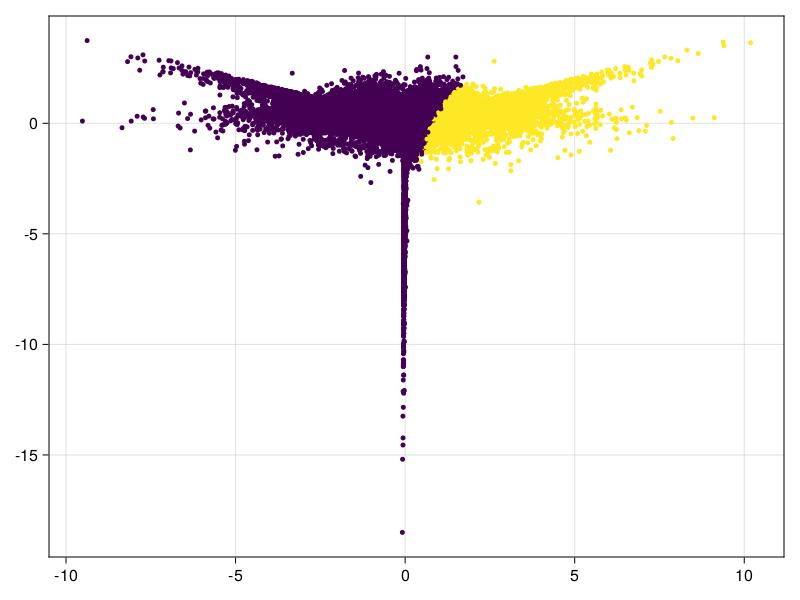

In [11]:
scatter(PCA_data[1,:], PCA_data[2,:], markersize = 5, color = result.assignments)